# Scikit-learn Stochastic Gradient Descent
Scikit-learn has a gradient descent regression model (called Stochastic Gradient Descent) [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like the gradient descent implementation as shown below, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as shown below. Here it is referred to as 'standard score'.

In [213]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# Prepare data

In the first step, let's generate random regression data using sklearn make_regression() function. The random dataset contains 50 features and 5000 samples. 

In [214]:
# genrate random regression data
x, y = make_regression(n_samples=5000, n_features=50)

# Feature scaling

To improve the accuracy of the model, both x and y data are scaled and splitted into training and testing datasets. Here, 30 percent of the samples are used as test data.

In [215]:
# scale data
x = scale(x)
y = scale(y)
# split data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30)

# Model training and checking the accuracy

The SGDRegressor class is used for model training. Here, the default parameters of the SGDRegressor class is used [[sklearn.linear_model.SGDRegressor]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor). 

The model can be checked using accuracy score. The coefficient of determination is defined as $(1 - u/v)$, where $u $ is the residual sum of squares `((y_true - y_pred)** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. The best possible score is $1.0$ and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of $y$, disregarding the input features, would get a score of $0.0$ [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.score).

In [216]:
# initialize SGD regressor
sgdr = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0,
                    epsilon=0.1, random_state=None, learning_rate='invscaling',
                    eta0=0.01, power_t=0.25, early_stopping=False,
                    validation_fraction=0.1, n_iter_no_change=5,
                    warm_start=False, average=False);

# train the model
sgdr.fit(xtrain, ytrain)

# check the sore (R-squared)
score = sgdr.score(xtrain, ytrain)
print("The R-squared is:", score)

The R-squared is: 0.9999999904773544


# Model cross-validation

The ross-validation method can be applied to the model and the accuracy of the training can be checked [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [217]:
cv_score = cross_val_score(sgdr, x, y, cv=10)
print("The CV mean score is: ", cv_score.mean())

The CV mean score is:  0.9999999896714243


#  Predicting and accuracy check

Now, the test data can be predicted by using the trained model. The accuracy of the predicted data can be checked by using MSE and RMSE metrics.

the MSE is:  9.006469388063237e-09
the RMSE is:  9.490242034881532e-05


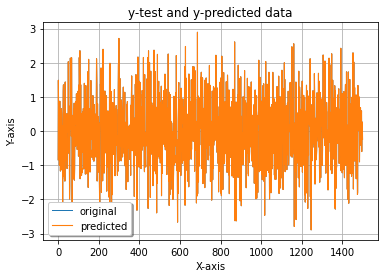

In [218]:
# predict using the test data
ypred = sgdr.predict(xtest)

# check the accuracy of the prediction
mse = mean_squared_error(ytest, ypred)
print("the MSE is: ", mse)
print("the RMSE is: ", mse**(1/2.0))

# plot the results
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# California housing price prediction

Here, we apply the stochastic linear regression method to the California housing price regression dataset. We'll load it by using `fetch_california_housing()` function, scale and split into train and test parts. Then, we define model by changing some of the parameters, check training accuracy, and predict test data. 

California housing dataset prediction.
the R-squared is: 0.601597562956804
the MSE is:  0.38797934667044087
the RMSE is:  0.6228798814140981


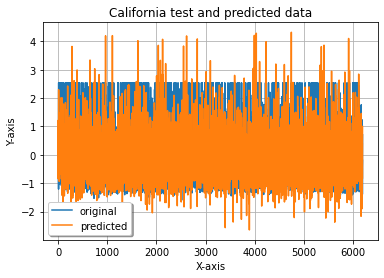

In [219]:
print("California housing dataset prediction.")

# load the data
california = fetch_california_housing()
x, y = california.data, california.target

# scale the data
x = scale(x)
y = scale(y)

# split the data into test and training datasets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30)

# apply SGD regressor and fit the model
sgdr = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=0.0001, shuffle=True, verbose=0,
                    epsilon=0.1, random_state=None, learning_rate='invscaling',
                    eta0=0.01, power_t=0.25, early_stopping=False,
                    validation_fraction=0.1, n_iter_no_change=5,
                    warm_start=False, average=False)
sgdr.fit(xtrain, ytrain)

# check the R^2
score = sgdr.score(xtrain, ytrain)
print("the R-squared is:", score)

# predict using the test data
ypred = sgdr.predict(xtest)

# check the accuracy of the prediction
mse = mean_squared_error(ytest, ypred)
print("the MSE is: ", mse)
print("the RMSE is: ", mse**(1/2.0))

# plot the results
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("California test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 